In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols_name = ['url', 'Speical_Char', 'Have_IP', 'Have_At', 'URL_length', 'URL_Depth', 'redirection', 'time_get_redirect', 
            'port_in_url', 'use_http', 'http_in_domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'trusted_ca', 
            'domain_lifespan', 'domain_timeleft', 'same_asn', 'iFrame', 'Mouse_Over', 'Right_Click', 'eval', 'unescape',
            'escape', 'ActiveXObject', 'fromCharCode', 'atob', 'Punny_Code', 'TLDs', 'Title', 'country_name', 'label']

In [3]:
features = cols_name[1:-4]
print(features)
print(len(features))

['Speical_Char', 'Have_IP', 'Have_At', 'URL_length', 'URL_Depth', 'redirection', 'time_get_redirect', 'port_in_url', 'use_http', 'http_in_domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'trusted_ca', 'domain_lifespan', 'domain_timeleft', 'same_asn', 'iFrame', 'Mouse_Over', 'Right_Click', 'eval', 'unescape', 'escape', 'ActiveXObject', 'fromCharCode', 'atob', 'Punny_Code']
27


In [4]:
df = pd.read_csv("../dataset_generate/cld_dataset_03082021.csv")
df.head()

,url,Speical_Char,Have_IP,Have_At,URL_length,URL_Depth,redirection,time_get_redirect,port_in_url,use_http,...,unescape,escape,ActiveXObject,fromCharCode,atob,Punny_Code,TLDs,Title,country_name,label
0,https://sites.google.com/site/policyclaming76745/,3,0,0,0,2,6,0,0,0,...,0,0,0,0,0,0,com,Google Sites,US,1
1,https://www.pinterest.com/abbiestever/?redirec...,5,0,0,0,1,6,0,0,0,...,0,0,0,0,0,0,com,Abbie Roose Stever (abbiestever) - Profile | P...,NaN,0
2,https://www.pinterest.com/abiolatv/bombshell-g...,3,0,0,1,2,6,0,0,0,...,0,0,0,0,0,0,com,No Title,NaN,0
3,https://balajipackersguntur.com/images/,2,0,0,0,1,6,0,0,0,...,0,0,0,0,0,0,com,Index of /images,IN,1
4,https://sites.google.com/site/claming564336670...,3,0,0,0,2,6,0,0,0,...,0,0,0,0,0,0,com,SECURITY,NaN,1


In [5]:
df_train = df.drop(['TLDs', 'Title', 'country_name'], axis = 1)
df_train.head()

,url,Speical_Char,Have_IP,Have_At,URL_length,URL_Depth,redirection,time_get_redirect,port_in_url,use_http,...,Mouse_Over,Right_Click,eval,unescape,escape,ActiveXObject,fromCharCode,atob,Punny_Code,label
0,https://sites.google.com/site/policyclaming76745/,3,0,0,0,2,6,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,https://www.pinterest.com/abbiestever/?redirec...,5,0,0,0,1,6,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,https://www.pinterest.com/abiolatv/bombshell-g...,3,0,0,1,2,6,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,https://balajipackersguntur.com/images/,2,0,0,0,1,6,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,https://sites.google.com/site/claming564336670...,3,0,0,0,2,6,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [6]:
valid_features = []
for feature in df_train.columns:
    val = dict(df_train[feature].value_counts())
    if(len(val.keys()) > 1):
        valid_features.append(feature)
        #print(val)

In [7]:
df_train_new = df_train[valid_features]
df_train_new.head()

,url,Speical_Char,Have_At,URL_length,URL_Depth,redirection,port_in_url,use_http,http_in_domain,TinyURL,Prefix/Suffix,DNS_Record,domain_lifespan,domain_timeleft,same_asn,iFrame,Mouse_Over,Right_Click,label
0,https://sites.google.com/site/policyclaming76745/,3,0,0,2,6,0,0,0,0,0,0,0,0,1,0,0,1,1
1,https://www.pinterest.com/abbiestever/?redirec...,5,0,0,1,6,0,0,0,1,0,0,0,0,0,0,0,1,0
2,https://www.pinterest.com/abiolatv/bombshell-g...,3,0,1,2,6,0,0,0,1,0,0,0,0,0,0,0,1,0
3,https://balajipackersguntur.com/images/,2,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,1,1
4,https://sites.google.com/site/claming564336670...,3,0,0,2,6,0,0,0,0,0,0,0,0,0,0,0,1,1


In [9]:
df_train.drop(valid_features, axis=1).columns

Index(['Have_IP', 'time_get_redirect', 'trusted_ca', 'eval', 'unescape',
       'escape', 'ActiveXObject', 'fromCharCode', 'atob', 'Punny_Code'],
      dtype='object')

In [9]:
#inner = pd.merge(left=df_origin, right=df_train, left_on=['url','labels'], right_on=['url','labels'],how='left')
# del inner['urls']

In [8]:
from collections import defaultdict
import re

url_group = defaultdict(list)
group_pattern = r"((http|https)(://[^/]+/*))"

for url in df_train_new["url"]:
    group = re.findall(group_pattern, url)[0][0]
    url_group[group].append(url)
    


In [12]:
unique_url = 0
for k, v in url_group.items():
    if(len(v) > 100):
        print(k, ": ", len(v))
    if(len(v) == 1):
        unique_url += 1
print(unique_url)

https://sites.google.com/ :  1793
https://www.pinterest.com/ :  2883
https://plus.google.com/ :  4638
https://302721e7-4e4e-415a-90ef-c32e6f66c17d.id.repl.co/ :  163
http://tinnhanh360.net/ :  114
http://mylust.com/ :  164
https://support.office.com/ :  3716
http://twitter.com/ :  174
http://kenh14.vn/ :  222
http://depositphotos.com/ :  130
http://mashable.com/ :  110
https://www.ringcentral.com/ :  1811
https://www.wcupa.edu/ :  407
http://sbi.mx/ :  152
https://www.efax.com/ :  205
https://aka.ms/ :  349
https://wcupa.edu/ :  655
http://techcrunch.com/ :  190
http://mic.com/ :  281
http://nypost.com/ :  118
https://mail.google.com/ :  791
http://bit.ly/ :  175
http://grantland.com/ :  110
http://ct54015.tmweb.ru/ :  104
http://cw63895.tmweb.ru/ :  103
https://store.apple.com/ :  127
http://torcache.net/ :  578
http://cn38961.tmweb.ru/ :  219
https://bit.ly/ :  236
http://ca70130.tmweb.ru/ :  132
http://fepro.cs.buap.mx/ :  360
https://agilityhurdles.net/ :  226
https://twitter.com/ 

In [13]:
df_train_new["label"].value_counts()

0    135323
1     32549
Name: label, dtype: int64

In [22]:
invalid_url = []
for k, v in url_group.items():
    group_labels = df_train_new.loc[df_train_new["url"].isin(v), "label"]
    if(len(group_labels.unique()) != 1):
        print(k)
        print(group_labels.value_counts())
        invalid_url.extend(v) 
print('Number of invalid url: ', len(invalid_url))


https://sites.google.com/
1    1792
0       1
Name: label, dtype: int64
https://plus.google.com/
0    4622
1      16
Name: label, dtype: int64
https://drive.google.com/
1    89
0     1
Name: label, dtype: int64
https://mail.google.com/
0    788
1      3
Name: label, dtype: int64
https://www.google.com/
1    57
0     3
Name: label, dtype: int64
https://twitter.com/
0    143
1     16
Name: label, dtype: int64
https://docs.google.com/
1    103
0      1
Name: label, dtype: int64
https://www.youtube.com/
0    4
1    3
Name: label, dtype: int64
https://www.facebook.com/
1    14
0    12
Name: label, dtype: int64
https://accounts.google.com/
1    19
0     1
Name: label, dtype: int64
https://chrome.google.com/
1    2
0    1
Name: label, dtype: int64
https://facebook.com/
1    10
0     1
Name: label, dtype: int64
https://login.live.com/
1    4
0    1
Name: label, dtype: int64
https://www.linkedin.com/
1    2
0    1
Name: label, dtype: int64
https://thefamousfitnessplan.com
1    1
0    1
Name: la

In [23]:
df_train_filter = df_train_new.loc[~df_train_new["url"].isin(invalid_url)]
df_train_filter.shape

(160158, 19)

In [26]:
print(len(url_group.keys()))
wrong_group = []
for k, v in url_group.items():
    group_labels = df_train_new.loc[df_train_new["url"].isin(v), "label"]
    if(len(group_labels.unique()) != 1):
        wrong_group.append(k)
for k in wrong_group:
    del url_group[k]
print(len(url_group.keys()))

128823
128808


In [28]:
url_pair_split = {}
url_domain_group = []

for k, v in url_group.items():
    if(len(v) == 1):
        continue
    labels = df_train_new.loc[df_train_new["url"]==v[0], "label"]
    url_pair_split[k] = [v, labels]
    url_domain_group.extend(v)
    

In [29]:
len(url_pair_split.keys())

3543

In [46]:

for k in url_pair_split.keys():
    print(url_pair_split[k][1].values[0])
    break

0


In [30]:
# each domain have only one url 
df_train_one = df_train_filter.loc[~df_train_filter["url"].isin(url_domain_group)]
# each domain have many urls
df_train_many = df_train_filter.loc[df_train_filter["url"].isin(url_domain_group)]

print(df_train_many.shape)
df_train_one.shape

(34893, 19)


(125265, 19)

In [31]:
df_train_one.head()

,url,Speical_Char,Have_At,URL_length,URL_Depth,redirection,port_in_url,use_http,http_in_domain,TinyURL,Prefix/Suffix,DNS_Record,domain_lifespan,domain_timeleft,same_asn,iFrame,Mouse_Over,Right_Click,label
3,https://balajipackersguntur.com/images/,2,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,1,1
5,https://gwyoo.com,2,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,1,0
6,https://isa.org.jm,3,0,0,0,6,0,0,0,0,0,0,1,1,1,0,0,1,0
7,https://ringling.com,2,0,0,0,6,0,0,0,0,0,0,0,1,0,0,0,1,0
8,https://ouo.io,2,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
X = df_train_one.drop(["url", "label"], axis = 1).values 
y = df_train_one["label"].values

X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [52]:
print(X_one_train.shape) 
print(X_one_test.shape)

(93948, 17)
(31317, 17)


In [71]:
X_one_train[:10]

array([[ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         1],
       [10,  0,  1,  3,  6,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
         1],
       [ 2,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         1]])

In [54]:
# split for domain have many urls, fix data leakage
Xs = [] 
ys = []
for k, v in url_pair_split.items():
    Xs.append(k)
    ys.append(v[1].values[0])

Xs = np.array(Xs)
ys = np.array(ys)

X_many_train, X_many_test, y_many_train, y_many_test = train_test_split(Xs, ys,
                                                    stratify=ys, 
                                                    test_size=0.25, train_size=0.75)  


In [55]:
print(X_many_train.shape) 
print(X_many_test.shape)

(2657,)
(886,)


In [59]:
# get url from each domain to merge with {one} 
def get_many_url(x, y):
    nx = []
    ny = []
    for domain, label in zip(x, y):
        urls = url_pair_split[domain][0]
        for url in urls:
            nx.append(url)
            ny.append(label)
    return nx, ny 

nx_train, ny_train = get_many_url(X_many_train, y_many_train)
nx_test, ny_test = get_many_url(X_many_test, y_many_test)

In [72]:
nx_train_features = [] 
nx_test_features = []
for url in nx_train:
    nx_train_features.extend(df_train_many.loc[df_train_many["url"]==url].drop(["url", "label"], axis=1).values.tolist())
for url in nx_test:
    nx_test_features.extend(df_train_many.loc[df_train_many["url"]==url].drop(["url", "label"], axis=1).values.tolist())
print(nx_train_features[:2])
print(nx_test_features[:2])

[[6, 1, 1, 2, 5, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [6, 1, 1, 2, 5, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]]
[[3, 0, 1, 2, 5, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [3, 0, 1, 2, 5, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]]


In [75]:
nx_train_features = np.array(nx_train_features)
nx_test_features = np.array(nx_test_features)
print(nx_train_features.shape)
print(nx_test_features.shape)
ny_train = np.array(ny_train)
ny_test = np.array(ny_test)
print(ny_train.shape)
print(ny_test.shape)

(26350, 17)
(8543, 17)
(26350,)
(8543,)


In [76]:
print(nx_train_features[-5:])
print(ny_train[-5:])

[[ 3  0  0  1  5  0  1  0  0  0  0  0  0  0  0  0  1]
 [11  0  1  1  5  0  1  0  0  0  0  0  0  0  0  0  1]
 [10  0  0  1  5  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 2  0  0  1  5  0  1  0  0  0  0  1  1  1  0  0  1]
 [ 2  0  0  1  5  0  1  0  0  0  0  1  1  1  0  0  1]]
[1 1 1 1 1]


In [77]:
# merge dataset from many and one 

assert nx_train_features.shape[1] == X_one_train.shape[1], "Wrong"
X_train = np.concatenate([X_one_train, nx_train_features], axis = 0)
y_train = np.concatenate([y_one_train, ny_train], axis = 0) 
X_test = np.concatenate([X_one_test, nx_test_features], axis = 0)
y_test = np.concatenate([y_one_test, ny_test], axis = 0)

In [79]:
X_train.shape
y_train.shape

(120298,)

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

parameters = [{'n_estimators': [100, 200, 300, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters, cv =5, n_jobs= -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 200, 300, 700]}])

In [81]:
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

Best Accurancy =0.8671772288662636
best parameters ={'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 700}


In [82]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 700, criterion = "entropy", max_features = 'log2',  random_state = 0)
classifier.fit(X_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#pickle file joblib
joblib.dump(classifier, 'rf_data_balance.pkl')

[[28752  4099]
 [  803  6206]]


['rf_data_balance.pkl']

In [84]:
from sklearn.metrics import classification_report
target_names = ["Legit", "Phishing"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Legit       0.97      0.88      0.92     32851
    Phishing       0.60      0.89      0.72      7009

    accuracy                           0.88     39860
   macro avg       0.79      0.88      0.82     39860
weighted avg       0.91      0.88      0.89     39860



# Important Features plot

In [86]:
names = np.array(valid_features[1:-1])
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

In [87]:
list(var_imp.to_dict('dict')['importance'].keys())

['URL_Depth',
 'Speical_Char',
 'use_http',
 'redirection',
 'URL_length',
 'Prefix/Suffix',
 'same_asn',
 'domain_lifespan',
 'domain_timeleft',
 'port_in_url',
 'DNS_Record',
 'TinyURL',
 'Have_At',
 'http_in_domain',
 'iFrame',
 'Mouse_Over',
 'Right_Click']

Text(0, 0.5, 'FEATURE NAMES')

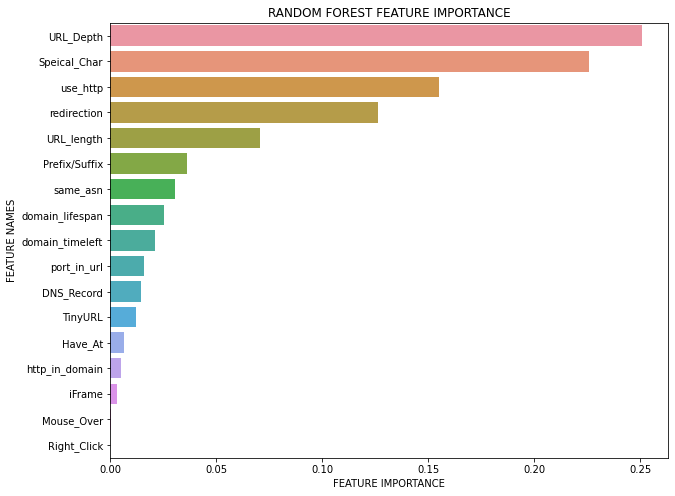

In [88]:
fi_df = var_imp

fi_df.sort_values(by=['importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['importance'], y=list(var_imp.to_dict('dict')['importance'].keys()))
#Add chart labels
plt.title('RANDOM FOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [31]:
imp_fea = pd.DataFrame.from_dict(var_imp)
imp_fea.to_csv('importances.csv', encoding='utf-8')

# Testing

In [5]:
from feature_extraction import *

classifier = joblib.load('rf_final.pkl')

ext = Extractor()
url = "http://35.211.157.248/wordpress/wp-content/plugins/kcupikfcsj/adn/one%202"
Vector = np.array(ext(url)[:-1])
print(Vector)
prediction = classifier.predict(Vector.reshape(1, -1))
print(prediction)

ModuleNotFoundError: No module named 'dns'

In [144]:
black[0]

{'_id': '604bb52f6a1161c2e7d8608c',
 'url': 'http://2021-lmht.gq/*',
 'type': 'scam',
 'level': 'high',
 'meta': {}}

In [ ]:
for i in black:
    Vector = np.array(ext(i['url'])).reshape(1, -1)
    
    prediction = classifier.predict(Vector )
    print(prediction)

Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Domain Age:  1826
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  366
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0]
Domain Age:  5843
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  1096
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  1096
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1